In [1]:
import pandas as pd

# Read the data from the CSV file
data = pd.read_csv('dataset_all.csv')
data

,Ti,V,Fe,Co,Ni,Zr,Mo,Sn,W,CM_type,...,MS2_morph,CP_morph,SSA,C,Cation,Anion,P_low,P_high,CD,Cs
0,True,False,False,False,False,False,False,False,False,G-based,...,irregular nanoparticles,supported,289.4,6.0,K,OH,-0.5,0.5,1.0,97.0
1,True,False,False,False,False,False,False,False,False,G-based,...,irregular nanoparticles,supported,301.8,6.0,K,OH,-0.5,0.5,1.0,102.0
2,True,False,False,False,False,False,False,False,False,G-based,...,irregular nanoparticles,supported,319.2,6.0,K,OH,-0.5,0.5,1.0,113.0
3,False,True,False,False,False,False,False,False,False,NoCP,...,nanosheets,NoCP,5.5,6.0,K,OH,0.0,0.5,1.0,152.0
4,False,True,False,False,False,False,False,False,False,NoCP,...,nanosheets,NoCP,5.5,6.0,K,OH,0.0,0.5,2.0,145.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,False,False,False,False,False,False,False,False,True,CNF,...,flower-like clusters,supported,10.8,1.0,K,OH,0.0,0.5,1.0,600.0
778,False,False,False,False,False,False,False,False,True,CNF,...,flower-like clusters,supported,10.8,1.0,K,OH,0.0,0.5,2.0,527.0
779,False,False,False,False,False,False,False,False,True,CNF,...,flower-like clusters,supported,10.8,1.0,K,OH,0.0,0.5,4.0,476.0
780,False,False,False,False,False,False,False,False,True,CNF,...,flower-like clusters,supported,10.8,1.0,K,OH,0.0,0.5,8.0,391.0


In [2]:
from scipy import stats

# 检查数据集中Cs列的异常值（IQR & Z-score）
# Calculate IQR
Q1 = data['Cs'].quantile(0.25)
Q3 = data['Cs'].quantile(0.75)
IQR = Q3 - Q1

# Identify IQR outliers
IQR_outliers = data[(data['Cs'] < (Q1 - 1.5 * IQR)) | (data['Cs'] > (Q3 + 1.5 * IQR))].index.tolist()

# Calculate Z-score
data['Cs_zscore'] = stats.zscore(data['Cs'])

# Identify Z-score outliers
Z_score_outliers = data[(data['Cs_zscore'] < -3) | (data['Cs_zscore'] > 3)].index.tolist()

# Print outliers in a table format

# Create a DataFrame for IQR outliers
IQR_outliers_df = pd.DataFrame({
    'Cs Value': data.loc[IQR_outliers, 'Cs']
})

# Create a DataFrame for Z-score outliers
Z_score_outliers_df = pd.DataFrame({
    'Cs Value': data.loc[Z_score_outliers, 'Cs'],
})

# Display the DataFrames
print("IQR outliers:")
print(IQR_outliers_df)

print("\nZ-score outliers:")
print(Z_score_outliers_df)


IQR outliers:
     Cs Value
209    3051.0
210    2862.0
211    2811.0
212    2698.0
213    2458.0
214    2260.0
215    2093.0
252    2306.0
258    2902.0
259    2643.0
260    2354.0
261    2029.0
264    3480.0
265    3227.0
266    2987.0
267    2648.0
268    2287.0
269    2100.0
270    2356.0
271    2063.0
276    2451.0
277    2302.0
278    2024.0
281    4474.0
282    3231.0
283    2934.0
284    2693.0
285    2408.0
286    2149.0
388    2141.0
389    2102.0
390    2030.0
444    2212.0
450    2022.0
456    2197.0
462    3040.0
463    2413.0
464    2445.0
465    2134.0
468    2683.0
469    2519.0
470    2362.0

Z-score outliers:
     Cs Value
209    3051.0
210    2862.0
211    2811.0
212    2698.0
258    2902.0
259    2643.0
264    3480.0
265    3227.0
266    2987.0
267    2648.0
281    4474.0
282    3231.0
283    2934.0
284    2693.0
462    3040.0
468    2683.0


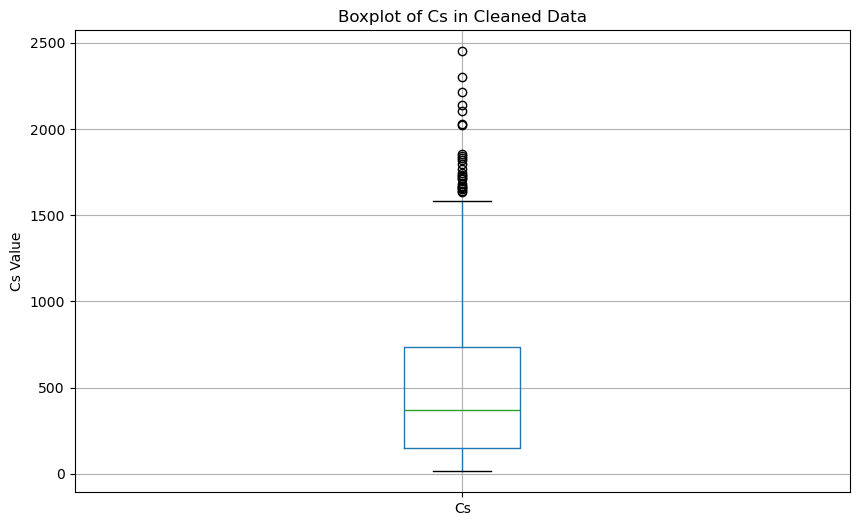

In [3]:
# 根据Z-score检测的异常值，将异常材料在的整篇文献数据删去
# 209~222 行删去
# 247~275 行删去
# 281~286 行删去
# 450~477 行删去

# Drop the specified rows from the dataframe
rows_to_drop = list(range(209, 223)) + list(range(247, 276)) + list(range(281, 287)) + list(range(450, 478))
data_removed_outliers_z = data.drop(rows_to_drop)

# 绘制data_cleaned的箱线图
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
data_removed_outliers_z.boxplot(column='Cs')
plt.title('Boxplot of Cs in Cleaned Data')
plt.ylabel('Cs Value')
plt.show()

In [6]:
# 保存处理后的数据集
data_removed_outliers_z.to_csv('dataset_removed_outliers_z.csv', index=False)